In [4]:
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
sns.get_dataset_names()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\DELL\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [23]:
dt=sns.load_dataset("tips")
dt

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
dt.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

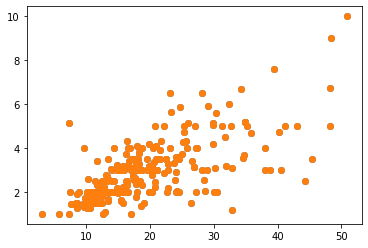

In [25]:
plt.scatter(x="total_bill",y="tip",data=dt)
plt.scatter(dt.total_bill,dt.tip)
plt.show()

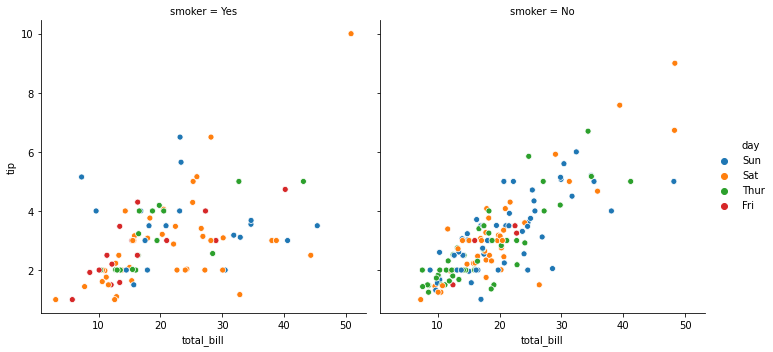

In [26]:
sns.relplot(x="total_bill",y="tip",data=dt,kind="scatter",hue="day",col="smoker")

In [29]:
x=np.arange(0,10,.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [30]:
y=np.sin(x)
y

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

In [35]:
z=np.cos(x)
z

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.81

Text(0.5, 1.0, 'WAVES')

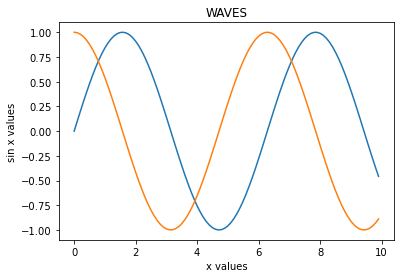

In [38]:
#plt.plot(x,y)
#plt.plot(x,z)
plt.plot(x,y,x,z)
plt.ylabel("sin x values")
plt.xlabel("x values")
plt.title("WAVES")

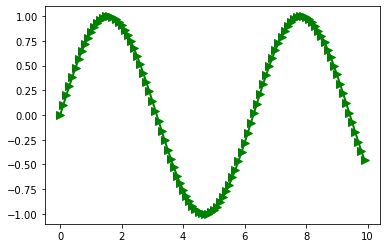

In [51]:
plt.plot(x,y,color="green",linestyle="-",linewidth="2",marker=">",markersize="8")

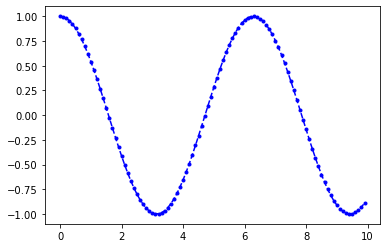

In [57]:
plt.plot(x,z,'b--.')#color linestyle marker

In [6]:
#polynomial_regression
#y=a+bx--->y=a+b1x1+b2x2(2)-----bnxn(n)
data=pd.read_csv("London.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,Price,Area_sq_ft,Num_of_Bedrooms,Num_of_Bathrooms,Num_of_Receptions
0,1675000,2716,5,5,5
1,650000,814,2,2,2
2,735000,761,2,2,2
3,1765000,1986,4,4,4
4,675000,700,2,2,2
...,...,...,...,...,...
3475,3350000,1410,3,3,3
3476,5275000,1749,3,3,3
3477,5995000,4435,6,6,6
3478,6300000,1506,3,3,3


In [7]:
x=data[["Area_sq_ft","Num_of_Bedrooms","Num_of_Bathrooms","Num_of_Receptions"]]
y=data.Price

In [8]:
#2steps(polynomial_features--->linear_regression)
#(1)ploynomial_features-->input(x)-->to higher degree
from sklearn.preprocessing import PolynomialFeatures 
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
x_poly

array([[1.000e+00, 2.716e+03, 5.000e+00, ..., 2.500e+01, 2.500e+01,
        2.500e+01],
       [1.000e+00, 8.140e+02, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        4.000e+00],
       [1.000e+00, 7.610e+02, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        4.000e+00],
       ...,
       [1.000e+00, 4.435e+03, 6.000e+00, ..., 3.600e+01, 3.600e+01,
        3.600e+01],
       [1.000e+00, 1.506e+03, 3.000e+00, ..., 9.000e+00, 9.000e+00,
        9.000e+00],
       [1.000e+00, 5.395e+03, 6.000e+00, ..., 3.600e+01, 3.600e+01,
        3.600e+01]])

In [9]:
#split_data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=.3)
x_train

array([[1.000e+00, 1.061e+03, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        4.000e+00],
       [1.000e+00, 8.950e+02, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        4.000e+00],
       [1.000e+00, 1.378e+03, 3.000e+00, ..., 9.000e+00, 9.000e+00,
        9.000e+00],
       ...,
       [1.000e+00, 7.810e+02, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        4.000e+00],
       [1.000e+00, 6.930e+02, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.875e+03, 4.000e+00, ..., 1.600e+01, 1.600e+01,
        1.600e+01]])

In [10]:
#model-->linear_regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [11]:
#train
model.fit(x_train,y_train)

LinearRegression()

In [12]:
#test
y_predict=model.predict(x_test)
y_predict

array([6329489.31466061,  950944.47292635, 1835985.56327368, ...,
       3570410.04358333, 4124414.83192105, 1052078.19055953])

In [13]:
import sklearn.metrics as mc
dir(mc)

['ConfusionMatrixDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_average_precision_score',
 'label_rank

In [14]:
mc.mean_squared_error(y_test,y_predict)

2154233983087.37

In [15]:
#(2)pipeline
#build_model
pipe_steps=[('poly_features',PolynomialFeatures(degree=3)),('linear_model',LinearRegression())]

In [16]:
from sklearn.pipeline import Pipeline
pipe_model=Pipeline(pipe_steps)

In [17]:
#train
pipe_model.fit(x_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('linear_model', LinearRegression())])

In [18]:
#predict
y_pipe_predict=pipe_model.predict(x_test)
y_pipe_predict

array([7674954.99045667, 1261653.24041995, 1865515.13581571, ...,
       2958902.57205924, 3985432.54273328, 1100901.81939707])

In [20]:
mc.mean_squared_error(y_test,y_pipe_predict)

2436137445786.0947